In [1]:
# HPC
import numpy as np
import xarray as xr
from scipy.interpolate import interp1d

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Paths and stuff
import os
import sys

sys.path.append('/home/shreyas/pySICOPOLIS/src')
from pySICOPOLIS import *

In [2]:
modelPath = '/home/shreyas/update_to_develop_sicopolis/sicopolis_spinups/sico_out/'
dataPath = '/scratch2/shreyas/GrIS_paleo_data/'

ds_surfvel_data_40km = xr.open_dataset(dataPath + 'surfvel_data_40kms.nc')
ds_surfvel_model_40km = xr.open_dataset(modelPath + 'grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp/grl40_bm5_paleo17a_nudged_CT4_BH0_m21ka_pkp0007.nc')

(4200313.0, 14184.881, 530607.0, 27027.94, 3510.5315)

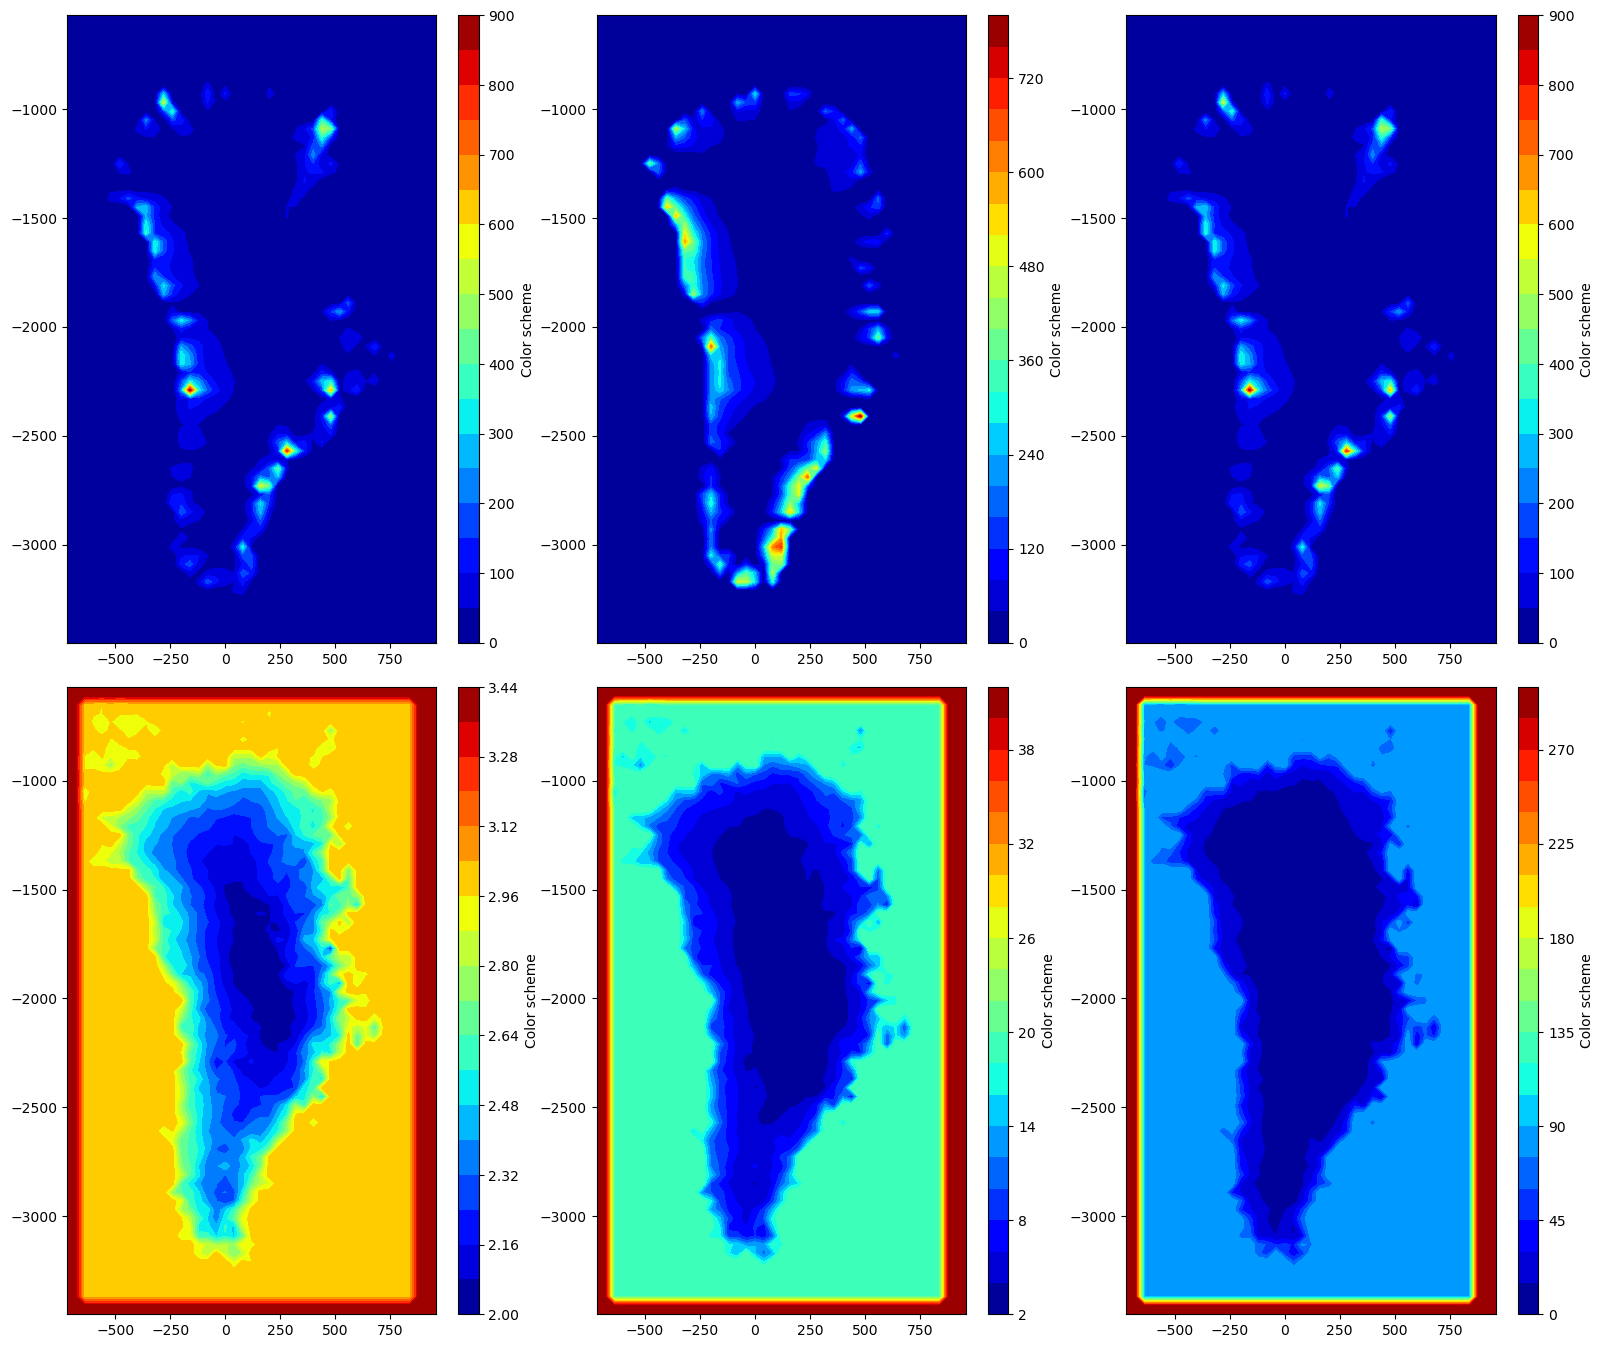

In [3]:
vs_data = ds_surfvel_data_40km["vs"].data
vs_unc_data = ds_surfvel_data_40km['vs_uncert'].data
vs_unc_real_data = ds_surfvel_data_40km['vs_uncert_realistic'].data
vs_unc_real_smoother_data = ds_surfvel_data_40km['vs_uncert_realistic_smoother'].data
vs_unc_real_smoothest_data = ds_surfvel_data_40km['vs_uncert_realistic_smoothest'].data
vs_model = (ds_surfvel_model_40km['vx_s_g'].data**2 + ds_surfvel_model_40km['vy_s_g'].data**2)**0.5

costs = 0.5*(vs_data - vs_model)**2
cost = np.sum(costs)

costs_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_data**2
cost_weighted = np.sum(costs_weighted)

costs_real_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_real_data**2
cost_real_weighted = np.sum(costs_real_weighted)

costs_real_smoother_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_real_smoother_data**2
cost_real_smoother_weighted = np.sum(costs_real_smoother_weighted)

costs_real_smoothest_weighted = 0.5*(vs_data - vs_model)**2/vs_unc_real_smoothest_data**2
cost_real_smoothest_weighted = np.sum(costs_real_smoothest_weighted)

n_rows, n_cols = 2, 3
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+1.0)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_model,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 2])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_real_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_real_smoother_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         vs_unc_real_smoothest_data,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 2])

plt.tight_layout()

cost, cost_weighted, cost_real_weighted, cost_real_smoother_weighted, cost_real_smoothest_weighted

/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))


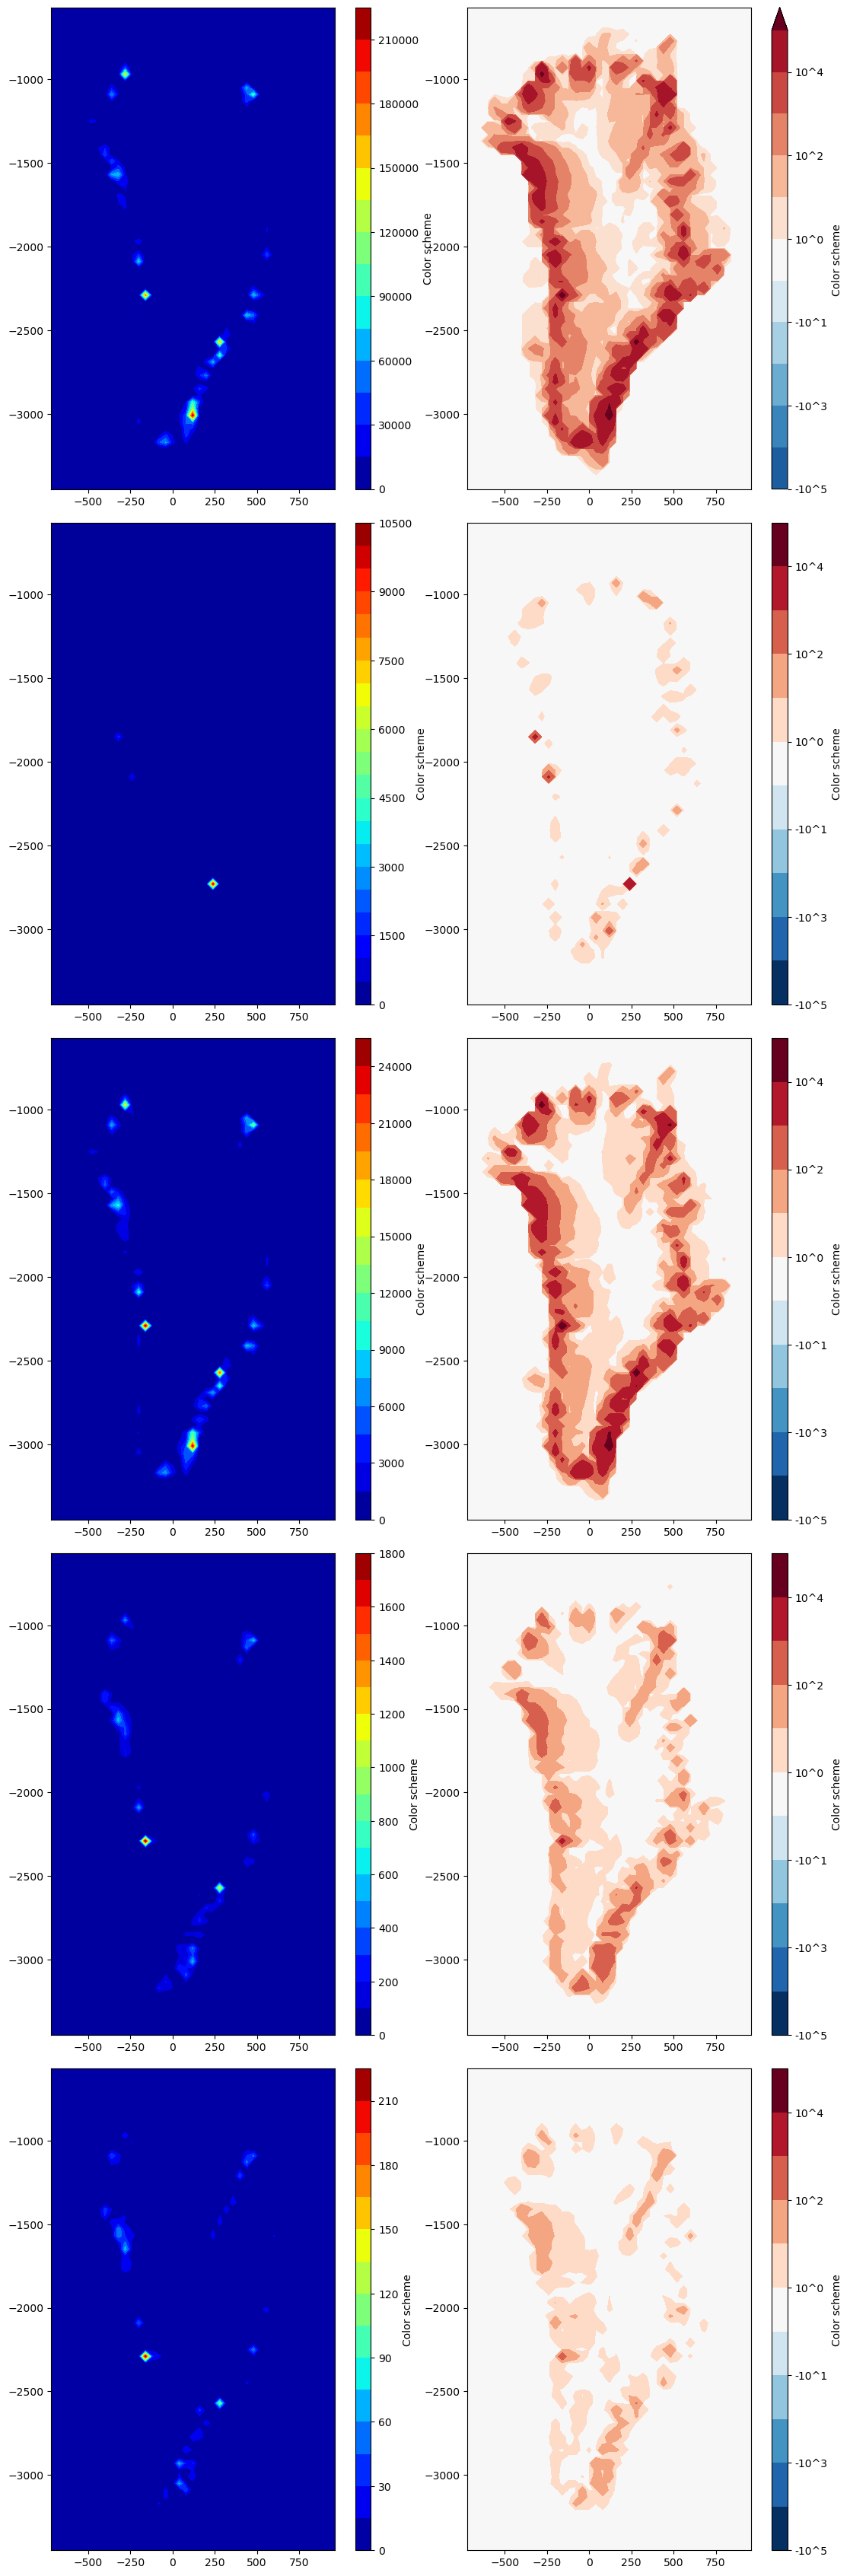

In [4]:
n_rows, n_cols = 5, 2
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+0.75)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4, 5], fig = fig, ax = ax[0, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_weighted,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4, 5], fig = fig, ax = ax[1, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[2, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_weighted,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4, 5], fig = fig, ax = ax[2, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_smoother_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[3, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_smoother_weighted,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4, 5], fig = fig, ax = ax[3, 1])
fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_smoothest_weighted,
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[4, 0])
fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         costs_real_smoothest_weighted,
                         cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3, 4, 5], fig = fig, ax = ax[4, 1])
plt.tight_layout()

In [5]:
np.sum(np.sort(costs.flatten())[::-1][:100])/cost, \
np.sum(np.sort(costs_weighted.flatten())[::-1][:100])/cost_weighted, \
np.sum(np.sort(costs_real_weighted.flatten())[::-1][:100])/cost_real_weighted, \
np.sum(np.sort(costs_real_smoother_weighted.flatten())[::-1][:100])/cost_real_smoother_weighted, \
np.sum(np.sort(costs_real_smoothest_weighted.flatten())[::-1][:100])/cost_real_smoothest_weighted

(0.8428433, 0.9778062, 0.8295297, 0.7599008, 0.70739543)

/scratch2/shreyas/mambaforge/envs/py310_LRP/lib/python3.10/site-packages/xarray/core/computation.py:818: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/scratch2/shreyas/mambaforge/envs/py310_LRP/lib/python3.10/site-packages/xarray/core/computation.py:818: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))
/home/shreyas/pySICOPOLIS/src/pySICOPOLIS/utils/visualization/plotting.py:124: RuntimeWarning: divide by zero encountered in log10
  log = np.log10(np.abs(data))


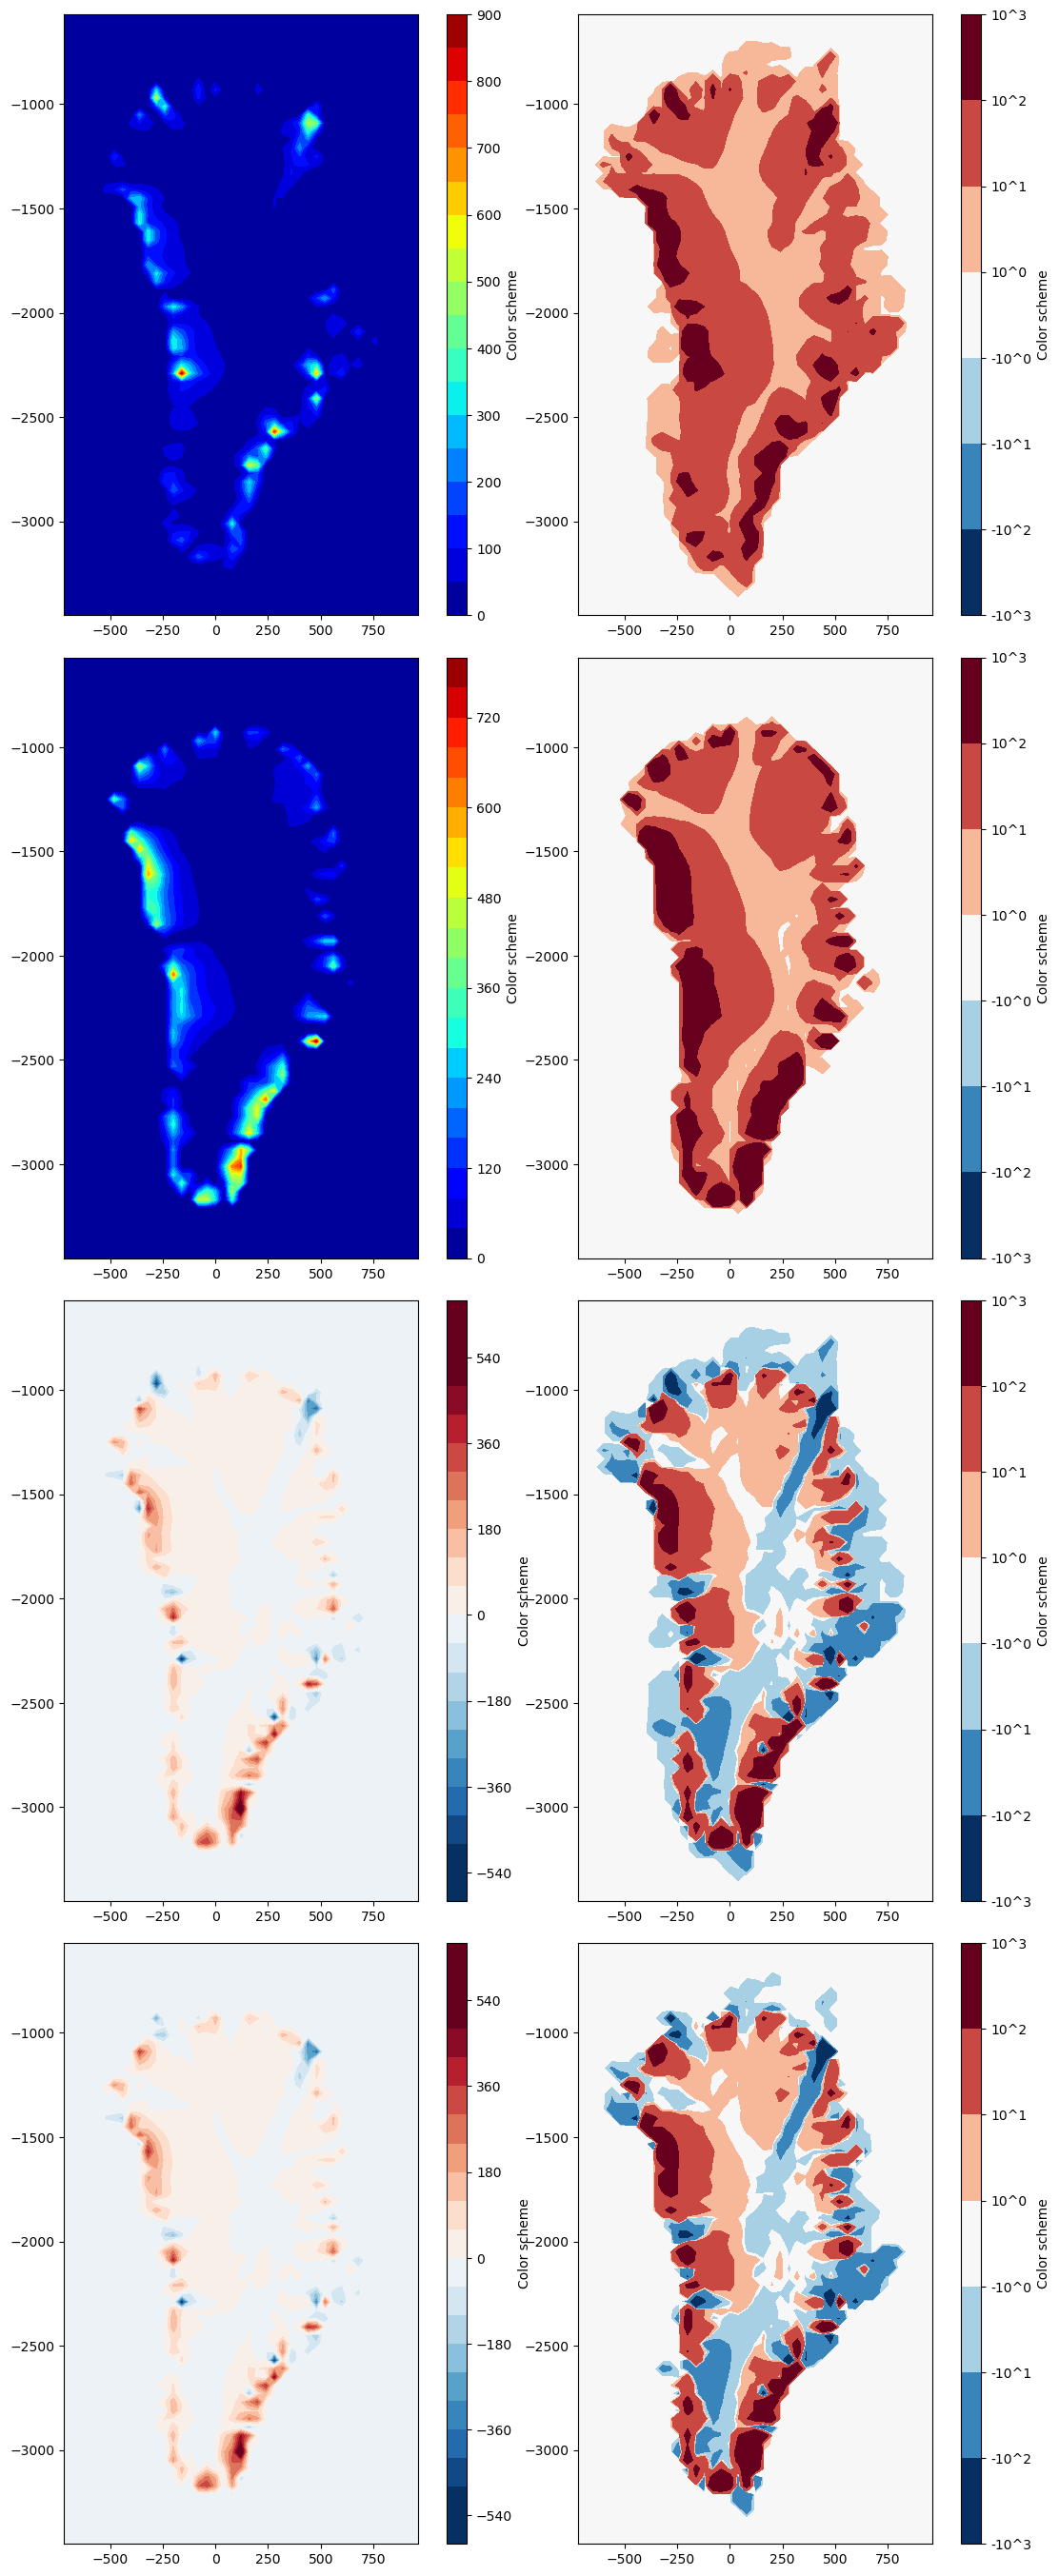

In [6]:
n_rows, n_cols = 4, 2
aspect_ratio = len(ds_surfvel_model_40km['x'])/len(ds_surfvel_model_40km['y'])
subplot_width = 4
subplot_height = subplot_width / aspect_ratio
plt.rcParams["figure.figsize"] = ((n_cols+0.75)*subplot_width, n_rows*subplot_height)
fig, ax = plt.subplots(n_rows, n_cols)

for axis in ax.flatten():
    axis.set_box_aspect(1/aspect_ratio)

fancyPlotter.plot_normal(ds_surfvel_data_40km['x'], 
                         ds_surfvel_data_40km['y'], 
                         ds_surfvel_data_40km['vs'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[0, 0])

fancyPlotter.plot_log(ds_surfvel_data_40km['x'], 
                      ds_surfvel_data_40km['y'], 
                      ds_surfvel_data_40km['vs'],
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3], fig = fig, ax = ax[0, 1])

fancyPlotter.plot_normal(ds_surfvel_model_40km['x']/1000, 
                         ds_surfvel_model_40km['y']/1000, 
                         ds_surfvel_model_40km['vh_s'],
                         cmap = 'jet', nbins = 20, fig = fig, ax = ax[1, 0])

fancyPlotter.plot_log(ds_surfvel_model_40km['x']/1000, 
                      ds_surfvel_model_40km['y']/1000, 
                      ds_surfvel_model_40km['vh_s'],
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3], fig = fig, ax = ax[1, 1])

fancyPlotter.plot_normal(ds_surfvel_model_40km['x']/1000, 
                         ds_surfvel_model_40km['y']/1000, 
                         ds_surfvel_model_40km['vh_s'].data - ds_surfvel_data_40km['vs'].data,
                         cmap = 'RdBu_r', vmin = -500, vmax = 500, nbins = 20, fig = fig, ax = ax[2, 0])

fancyPlotter.plot_log(ds_surfvel_model_40km['x']/1000, 
                      ds_surfvel_model_40km['y']/1000, 
                      ds_surfvel_model_40km['vh_s'].data - ds_surfvel_data_40km['vs'].data,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3], fig = fig, ax = ax[2, 1])

mask = (ds_surfvel_model_40km['H'] > 0).data
fancyPlotter.plot_normal(ds_surfvel_model_40km['x']/1000, 
                         ds_surfvel_model_40km['y']/1000, 
                         (ds_surfvel_model_40km['vh_s'].data - ds_surfvel_data_40km['vs'].data)*mask,
                         cmap = 'RdBu_r', vmin = -500, vmax = 500, nbins = 20, fig = fig, ax = ax[3, 0])

fancyPlotter.plot_log(ds_surfvel_model_40km['x']/1000, 
                      ds_surfvel_model_40km['y']/1000, 
                      (ds_surfvel_model_40km['vh_s'].data - ds_surfvel_data_40km['vs'].data)*mask,
                      cmap = 'RdBu_r', nbins = None, bin_edges = [0, 1, 2, 3], fig = fig, ax = ax[3, 1])

plt.tight_layout()